In [143]:
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Привет! Это тестовое задание от команды SmartFab!
SmartFab (Отдел Разработки ПО Искусственного Интеллекта Дивизион Искусственного Интеллекта Технологический блок)

### Чем мы занимаемся?
Команда решает задачи оптимизации, автоматизации и контроля производственных процессов на Фабрике YADRO (и не только) путем внедрения технологий машинного обучения и анализа данных. В частности, активно используются методы компьютерного зрения, цифровой обработки сигналов и статистика. 

### Чем предстоит заниматься тебе, если попадешь к нам в рамках Импульс 2025:
На стажировке в SmartFab ты сможешь принять участие в разработке одного из продуктов автоматической инспекции, применяемого на производстве. Познакомиться со всеми этапами разработки от постановки задачи до прототипирования систем с AI компонентами на борту для решения практических задач в условиях ограниченного количества данных

Во время стажировки нужно будет решать задачи из по анализу и обработке данных фото и видео данных:
1. Статистическая работа с разметкой, уточнение требований;
2. Эксплораторный анализ данных (EDA); 
3. Участие в разработке алгоритмов автоматического анализа данных;
4. Подготовка выборок для обучения, обучение моделей (ML/DL) и анализ результатов.



# Предисловие к заданию

1. Можно и нужно гуглить
2. Не все задания предполагают написание кода, там, где он нужен будет интуитивно понятно (например первые 2) Но если вам проще размышлять с кодом - вы можете так сделать, это даже приветсвуется.
3. Задания предполагают минимальное погружение в предметную область. В заданиях по набору данных копать в генетику не нужно.
4. Ответы можно оставлять в этой тетрадке под заголовоком "Ответ" после текста задания
5. Не стесняйтесь комментировать свои действия, если считаете, что они нужны. Так, например, импорты комментировать не надо :-)
6. Даже если вы решили не все - ничего страшного. Присылайте нам решения того, что удалось сделать. Лучше прислать часть ответов, чем не прислать ничего
7. Результат каждого задания оценивается в баллах. Даже если вы ошиблись где-то в задании - не беда. Все задание не будет считаться проваленным, а только часть с ошибкой. Но если вдруг вы строите гипотезу на неверных предположениях - то нельзя будет зачесть все остальное, поэтому будьте внимательны. Правильная предпосылка - 50% успеха.

Have fun!

# Задание 1 "Learning Mystery"

#### Максимальное кол-во баллов: 4

Представьте, что вы пытаетесь обучить детектор объектов на новом наборе данных с нуля.
Архитектуру модели вы взяли из torchvision/“tensorflow hub”. Модель сходится, на валидации хорошие метрики. Но по результатам визуализации на тестовых данных, вы видите, что модель часто «промахивается» мимо объектов либо их «пропускает». Каковы ваши дейтсвия?

## Ответ
Методы исправления проблемы представлены по разделам и внутри разделов методы расположены в порядке приоритетов с точки зрения повышения времязатратности. Фиксировать изменения следует в изоляции по каждому выполненному пункту. Каждый из разделов желательно проводить параллельно.
1. Уточнение метрик. \
Проверить выбрана ли метрика в соответствии с бизнес-задачей. (recall для минимизации ложно-отрицательности, precision для минимизации ложно-положительности, f1 для случаев где важна сбалансированность).
2. Проверка данных: \
a. Чистка данных: устранить N/A, выбросы, нормализация при высокой контрастности данных; \
b. Проверка на стратификацию датасетов; \
c. Проверка на дисбаланс классов; \
d. Проверка на отличающиеся распределения между train-validation и test данными; \
e. Переобучение/недообучение — аугментация данных оверспемплингом/даунсемплингом; \
f. Наращение объема данных.
3. Проверка модели: \
a. Поиск гиперпараметров через Grid Search (напр. learning rate); 
b. Переобучение/недообучение — отношение validation-loss/train-loss, ранняя остановка, регуляризация модели; \
c. Экспериментирование сокращением/наращением ёмкости модели (количества слоев/параметров); \
d. Тепловые карты активации для диагностики распознавания проблемных классов; \
e. Смена модели.

# Задание 2 "Camera Models" 

#### Максимальное кол-во баллов: 6

Ниже представлено изображение двух моделей камер. Блоки матриц нумеруются сверху вниз слева направо по отношению к смотрящему. Т.е. левый верхний угол (по отношению к смотрящему) камеры А – это А1 правый верхний – А4. И т.д. до А16. Аналогично с B. 
Координаты заданы в формате XYZ
Представьте, что на этой сцене расположен прямоугольный параллелепипед “P” с координатами: 
```[(4, 3, 6), (6, 3, 6), (6, 5, 6), (4, 5, 6), (4, 3, 1), (6, 3, 1), (6, 5, 1), (4, 5, 1)]```
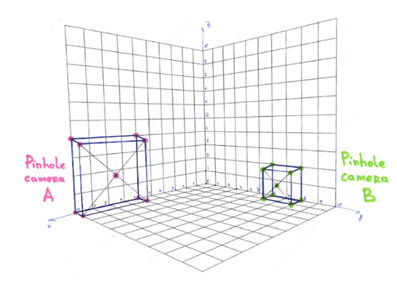

Ответьте, пожалуйста, на следующий набор вопросов по этой картинке:

1. В местится ли P полностью в кадр камеры А?
2. В местится ли P полностью в кадр камеры B?
3. Какие блоки матрицы А будут содержать P?
4. Какие блоки матрицы B будут содержать P?
5. В матрице А некий объект имеет координаты ```[(1, 3.5), (1, 4), (1.5, 4), (1.5, 3.5)]``` Каковы координаты этого объекта в матрице B если известно, что он расположен от камеры А на расстоянии 2?
6. Видно ли камеру B из камеры А и наоборот?


## Ответ
Допуская, что обзор камер ортогонален:
1. Нет, объект P не вместится  полностью в кадр камеры A, как показано на рисунке ниже: \
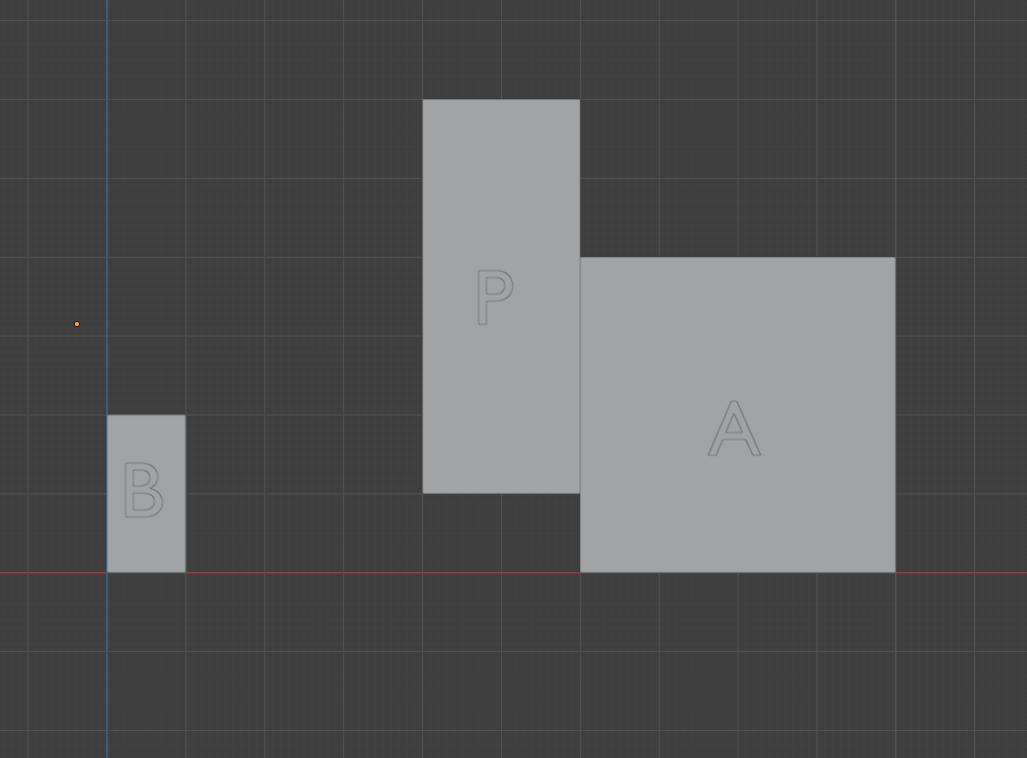
2. Нет, объект P не вместится полностью в кадр камеры B, как показано на рисунке ниже: \
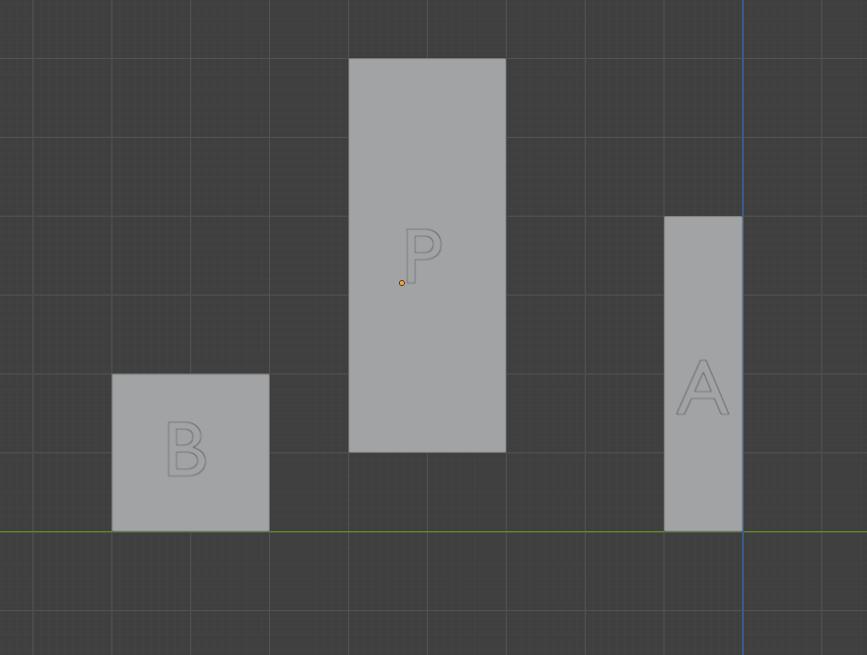
3. Никакие блоки матрицы A не содержат объект.
4. Никакие блоки матрицы B не содержат объект.
5. Для ответа приводится ряд допущений: \
a. Если центр координат матриц камер в углу снизу слева, то объект расположен как приведено на рисунке ниже: \
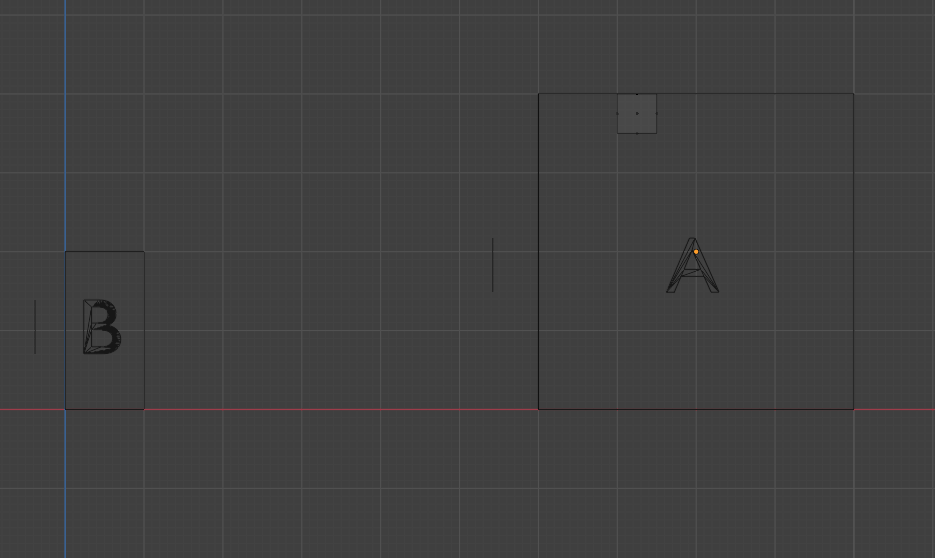 \
b. Учитывая ортогональность камер и данные в задаче, видимый объект в обзоре камеры А является проекцией и нельзя установить его третье измерение (за исключением отдаления от камеры). \
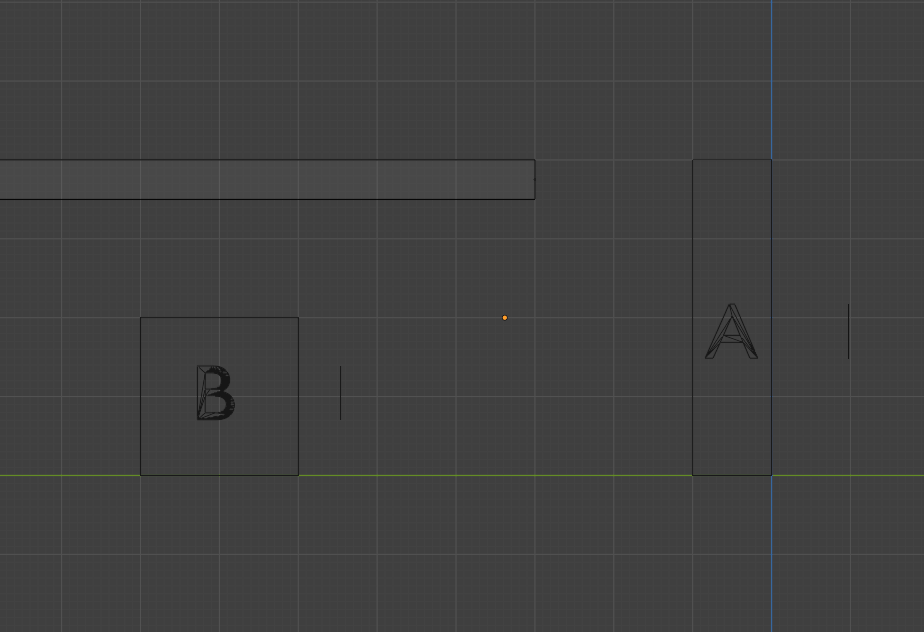 \
Учитывая эти условия, можно только утверждать что в проекции камеры B, правый торец объекта расположен по координатам камеры B (5, 3.5), (5, 4) и сам объект не находится в кадре камеры. \
Без проекции камеры B нельзя установить размерность объекта в третьем измерении.
6. Камеру B не видно из камеры A и наоборот.

# Задание 3 "Find substring"

#### Максимальное кол-во баллов: 4

Напишите алгоритм определения того, что строка s является подстрокой строки t.
Подстрока – строка состоящая из части символов исходной строки, расположенных в той же последовательности, но не обязательно стоящие в исходной строке вместе. Т.е. подстроку можно получить из строки путем удаления ряда символов
Пример: «авд» это подстрока строки «абвгд», а «адв», «ааб», «вге» - нет.

Алгоритм можно привести на любом языке (предпочтение Python или С/С++) с использованием любых стандартных для этого языка структур данных.

## Ответ

In [12]:
def function(string, substring):
    for i in range(len(string)):
        if string[i]==substring[0]:
            substring=substring[1:]
        else: continue
    if len(substring)==0:
        return 'Да, включает.'
    else: return 'Нет, Не включает.'

string = "abcde"
substring = "ace"
print('Включает ли строка \'{}\' подстроку \'{}\'?\nВывод: {}'.format(string, substring, function(string, substring)))

Включает ли строка 'abcde' подстроку 'ace'?
Вывод: Да, включает.


# Задание 4 "Glioma"

Это задание комплексное, предполагает работу с небольшим набором данных, состоит из нескольких частей 

#### Максимальное кол-во баллов: 12
Баллы за каждую часть:
1. 3 балла
2. 4 балла
3. 5 баллов

## Чтение данных

In [ ]:
!pip install requests

In [10]:
from io import StringIO
import requests
import pandas as pd
archive_url = "https://archive.ics.uci.edu/static/public/759/glioma+grading+clinical+and+mutation+features+dataset.zip"
request_content = requests.get(archive_url).content
str_stream = StringIO(request_content.split(b"TCGA_GBM_LGG_Mutations_all.csv")[1][3:].split(b"{")[0].rsplit(b'PK', 1)[0].decode('utf-8'))
dataset = pd.read_csv(str_stream)
dataset.head()

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,TCGA-LGG,TCGA-DU-8164,Male,51 years 108 days,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,LGG,TCGA-LGG,TCGA-QH-A6CY,Male,38 years 261 days,Mixed glioma,white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,LGG,TCGA-LGG,TCGA-HW-A5KM,Male,35 years 62 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,LGG,TCGA-LGG,TCGA-E1-A7YE,Female,32 years 283 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,LGG,TCGA-LGG,TCGA-S9-A6WG,Male,31 years 187 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


# Часть 1 
1. Найти и изучить описание набора данных
2. Описать природу признаков: то есть их смысловое значение.

Например если признак это флаг мутации гена - не обязательно писать что это за ген и за что он отвечает. Достаточно написать что "это бинарный признак мутации гена c названием X".

3. Написать какой из признаков является "target" т.е. значением, которое необходимо предсказывать и тип решаемой задачи.

Результат задания - табличка по типу метода info в pandas, где будет присутствовать название признака и его описание.

## Ответ

In [11]:
# 1. Найти и изучить описание набора данных.
# Ответ: Описание датасета найдено по ссылке: https://archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset

In [12]:
# 2. Описать природу признаков.
# Ответ: Описание признаков взято с карточки датасета по ссылке выше.
columns = pd.DataFrame(dataset.columns.tolist())
describtions = pd.DataFrame([
    "Glioma grade class information (0 = \"LGG\"; 1 = \"GBM\")",
    "corresponding TCGA-LGG or TCGA-GBM project names",
    "related project Case_ID information",
    "Gender (0 = \"male\"; 1 = \"female\")",
    "Age at diagnosis with the calculated number of days",
    "information related to the type of primary diagnosis",
    "Race (0 = \"white\"; 1 = \"black or african American\"; 2 = \"asian\"; 3 = \"american indian or alaska native\")",
    "isocitrate dehydrogenase (NADP(+))1 (0 = NOT_MUTATED; 1= MUTATED)",
    "tumor protein p53 (0 = NOT_MUTATED; 1 = MUTATED)",
    "ATRX chromatin remodeler (0 = NOT_MUTATED; 1 = MUTATED)",
    "phosphatase and tensin homolog (0 = NOT_MUTATED; 1 = MUTATED)",
    "epidermal growth factor receptor (0 = NOT_MUTATED; 1 = MUTATED)",
    "capicua transcriptional repressor (0 = NOT_MUTATED; 1 = MUTATED)",
    "mucin 16, cell surface associated (0 = NOT_MUTATED; 1 = MUTATED)",
    "phosphatidylinositol-4,5-bisphosphate 3-kinase catalytic subunit alpha (0 = NOT_MUTATED; 1 = MUTATED)",
    "neurofibromin 1 (0 = NOT_MUTATED; 1 = MUTATED)",
    "phosphoinositide-3-kinase regulatory subunit 1 (0 = NOT_MUTATED; 1 = MUTATED)",
    "far upstream element binding protein 1 (0 = NOT_MUTATED; 1 = MUTATED)",
    "RB transcriptional corepressor 1 (0 = NOT_MUTATED; 1 = MUTATED)",
    "notch receptor 1 (0 = NOT_MUTATED; 1 = MUTATED)",
    "BCL6 corepressor (0 = NOT_MUTATED; 1 = MUTATED)",
    "CUB and Sushi multiple domains 3 (0 = NOT_MUTATED; 1 = MUTATED)",
    "SWI/SNF related, matrix associated, actin dependent regulator of chromatin, subfamily a, member 4 (0 = NOT_MUTATED; 1 = MUTATED)",
    "glutamate ionotropic receptor NMDA type subunit 2A (0 = NOT_MUTATED; 1 = MUTATED)",
    "isocitrate dehydrogenase (NADP(+)) 2 (0 = NOT_MUTATED; 1 = MUTATED)",
    "FAT atypical cadherin 4 (0 = NOT_MUTATED; 1 = MUTATED)",
    "platelet-derived growth factor receptor alpha (0 = NOT_MUTATED; 1 = MUTATED)"
])
data_info = pd.concat([columns, describtions], axis=1)
data_info


,0,0
0,Grade,"Glioma grade class information (0 = ""LGG""; 1 =..."
1,Project,corresponding TCGA-LGG or TCGA-GBM project names
2,Case_ID,related project Case_ID information
3,Gender,"Gender (0 = ""male""; 1 = ""female"")"
4,Age_at_diagnosis,Age at diagnosis with the calculated number of...
5,Primary_Diagnosis,information related to the type of primary dia...
6,Race,"Race (0 = ""white""; 1 = ""black or african Ameri..."
7,IDH1,isocitrate dehydrogenase (NADP(+))1 (0 = NOT_M...
8,TP53,tumor protein p53 (0 = NOT_MUTATED; 1 = MUTATED)
9,ATRX,ATRX chromatin remodeler (0 = NOT_MUTATED; 1 =...


In [13]:
# 3. Написать какой из признаков является "target"
# Ответ: Признак "Grade"

# Часть 2

Оценить взаимосвязи между признаками с учетом типа признаков.
Написать комментарий почему применяется тот или иной тип рассчета связи между переменными.

Результат: матрица связей (или несколько матриц) приветствуется визуализация в виде тепловых карт

## Ответ

In [14]:
# 1. Препроцессинг данных.

# a. Устранение невыразительных данных.
# Поиск значений пропусков везда кроме фичи 'Case_ID'
def signature(dataset, features):
    uniques = []
    for i in range(len(features)):
        uniques.append(dataset[features[i]].unique())
    for i in range(len(features)):
        print(features[i],' ',uniques[i][:])
    print('\n')
    return uniques

features = ["Grade", "Project", "Gender", "Primary_Diagnosis", "Race", "IDH1", "TP53", "ATRX", "PTEN", "EGFR", "CIC", "MUC16", "PIK3CA", "NF1", "PIK3R1", "FUBP1", "RB1", "NOTCH1", "BCOR", "CSMD3", "SMARCA4", "GRIN2A", "IDH2", "FAT4", "PDGFRA"]
signature(dataset, features)

Grade   ['LGG' 'GBM']
Project   ['TCGA-LGG' 'TCGA-GBM']
Gender   ['Male' 'Female' '--']
Primary_Diagnosis   ['Oligodendroglioma, NOS' 'Mixed glioma' 'Astrocytoma, NOS'
 'Astrocytoma, anaplastic' 'Oligodendroglioma, anaplastic' '--'
 'Glioblastoma']
Race   ['white' 'asian' 'black or african american' '--' 'not reported'
 'american indian or alaska native']
IDH1   ['MUTATED' 'NOT_MUTATED']
TP53   ['NOT_MUTATED' 'MUTATED']
ATRX   ['NOT_MUTATED' 'MUTATED']
PTEN   ['NOT_MUTATED' 'MUTATED']
EGFR   ['NOT_MUTATED' 'MUTATED']
CIC   ['NOT_MUTATED' 'MUTATED']
MUC16   ['NOT_MUTATED' 'MUTATED']
PIK3CA   ['MUTATED' 'NOT_MUTATED']
NF1   ['NOT_MUTATED' 'MUTATED']
PIK3R1   ['NOT_MUTATED' 'MUTATED']
FUBP1   ['MUTATED' 'NOT_MUTATED']
RB1   ['NOT_MUTATED' 'MUTATED']
NOTCH1   ['NOT_MUTATED' 'MUTATED']
BCOR   ['NOT_MUTATED' 'MUTATED']
CSMD3   ['NOT_MUTATED' 'MUTATED']
SMARCA4   ['NOT_MUTATED' 'MUTATED']
GRIN2A   ['NOT_MUTATED' 'MUTATED']
IDH2   ['NOT_MUTATED' 'MUTATED']
FAT4   ['NOT_MUTATED' 'MUTATED']
PDGF

[array(['LGG', 'GBM'], dtype=object),
 array(['TCGA-LGG', 'TCGA-GBM'], dtype=object),
 array(['Male', 'Female', '--'], dtype=object),
 array(['Oligodendroglioma, NOS', 'Mixed glioma', 'Astrocytoma, NOS',
        'Astrocytoma, anaplastic', 'Oligodendroglioma, anaplastic', '--',
        'Glioblastoma'], dtype=object),
 array(['white', 'asian', 'black or african american', '--',
        'not reported', 'american indian or alaska native'], dtype=object),
 array(['MUTATED', 'NOT_MUTATED'], dtype=object),
 array(['NOT_MUTATED', 'MUTATED'], dtype=object),
 array(['NOT_MUTATED', 'MUTATED'], dtype=object),
 array(['NOT_MUTATED', 'MUTATED'], dtype=object),
 array(['NOT_MUTATED', 'MUTATED'], dtype=object),
 array(['NOT_MUTATED', 'MUTATED'], dtype=object),
 array(['NOT_MUTATED', 'MUTATED'], dtype=object),
 array(['MUTATED', 'NOT_MUTATED'], dtype=object),
 array(['NOT_MUTATED', 'MUTATED'], dtype=object),
 array(['NOT_MUTATED', 'MUTATED'], dtype=object),
 array(['MUTATED', 'NOT_MUTATED'], dtype=obje

In [15]:
# Удаление семплов со значениями '--' и 'not reported'.
# Удаление фичи 'Case_ID' (отсутствие выразительности для классификации).
filtered_dataset = dataset.astype(str).replace(['--', 'not reported'], np.nan)
filtered_dataset = filtered_dataset.dropna()
filtered_dataset = filtered_dataset.drop(columns=["Case_ID"])
filtered_dataset = filtered_dataset.astype(str)

signature(filtered_dataset, features)
filtered_dataset.to_csv("filtered_dataset.csv", index=False)
filtered_dataset

Grade   ['LGG' 'GBM']
Project   ['TCGA-LGG' 'TCGA-GBM']
Gender   ['Male' 'Female']
Primary_Diagnosis   ['Oligodendroglioma, NOS' 'Mixed glioma' 'Astrocytoma, NOS'
 'Astrocytoma, anaplastic' 'Oligodendroglioma, anaplastic' 'Glioblastoma']
Race   ['white' 'asian' 'black or african american'
 'american indian or alaska native']
IDH1   ['MUTATED' 'NOT_MUTATED']
TP53   ['NOT_MUTATED' 'MUTATED']
ATRX   ['NOT_MUTATED' 'MUTATED']
PTEN   ['NOT_MUTATED' 'MUTATED']
EGFR   ['NOT_MUTATED' 'MUTATED']
CIC   ['NOT_MUTATED' 'MUTATED']
MUC16   ['NOT_MUTATED' 'MUTATED']
PIK3CA   ['MUTATED' 'NOT_MUTATED']
NF1   ['NOT_MUTATED' 'MUTATED']
PIK3R1   ['NOT_MUTATED' 'MUTATED']
FUBP1   ['MUTATED' 'NOT_MUTATED']
RB1   ['NOT_MUTATED' 'MUTATED']
NOTCH1   ['NOT_MUTATED' 'MUTATED']
BCOR   ['NOT_MUTATED' 'MUTATED']
CSMD3   ['NOT_MUTATED' 'MUTATED']
SMARCA4   ['NOT_MUTATED' 'MUTATED']
GRIN2A   ['NOT_MUTATED' 'MUTATED']
IDH2   ['NOT_MUTATED' 'MUTATED']
FAT4   ['NOT_MUTATED' 'MUTATED']
PDGFRA   ['NOT_MUTATED' 'MUTATED']


,Grade,Project,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,PTEN,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,TCGA-LGG,Male,51 years 108 days,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,LGG,TCGA-LGG,Male,38 years 261 days,Mixed glioma,white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,LGG,TCGA-LGG,Male,35 years 62 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,LGG,TCGA-LGG,Female,32 years 283 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,LGG,TCGA-LGG,Male,31 years 187 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,GBM,TCGA-GBM,Female,77 years 325 days,Glioblastoma,white,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
858,GBM,TCGA-GBM,Male,85 years 65 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
859,GBM,TCGA-GBM,Female,77 years 178 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
860,GBM,TCGA-GBM,Male,63 years 121 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [45]:
# б. Кодировка данных
filtered_dataset = pd.read_csv("filtered_dataset.csv")

# Кодировка 'Age_at_diagnosis' из строки в float по годам.
def age(string):
    numbers = re.findall(r'\d+', string)
    
    if len(numbers) == 1:
        if "year" in string:
            years, days = int(numbers[0]), 0  # Only years specified
        elif "day" in string:
            years, days = 0, int(numbers[0])  # Only days specified
    elif len(numbers) == 2:
        years, days = map(int, numbers)  # Both years and days specified
    else:
        return None
    return round(years + days / 365, 2)

# Перевод категориальных значений в численное представление согласно легенде датасета на сайте
# 'Primary_Diagnosis': 'Oligodendroglioma, NOS'->0, 'Mixed glioma'->1, 'Astrocytoma, NOS'->2, 'Astrocytoma, anaplastic'->3, 'Oligodendroglioma, anaplastic'->4, 'Glioblastoma'->5
filtered_dataset["Age_at_diagnosis"] = filtered_dataset["Age_at_diagnosis"].apply(age)
filtered_dataset["Grade"] = filtered_dataset["Grade"].replace({"LGG": 0, "GBM": 1})
filtered_dataset["Project"] = filtered_dataset["Project"].replace({"TCGA-LGG": 0, "TCGA-GBM": 1})
filtered_dataset["Gender"] = filtered_dataset["Gender"].replace({"Male": 0, "Female": 1})
filtered_dataset["Primary_Diagnosis"] = filtered_dataset["Primary_Diagnosis"].replace({"Oligodendroglioma, NOS": 0,
                                                                                       "Mixed glioma": 1,
                                                                                       "Astrocytoma, NOS": 2,
                                                                                       "Astrocytoma, anaplastic": 3,
                                                                                       "Oligodendroglioma, anaplastic": 4,
                                                                                       "Glioblastoma": 5})
filtered_dataset["Race"] = filtered_dataset["Race"].replace({"white": 0,
                                                             "black or african american": 1,
                                                             "asian": 2,
                                                             "american indian or alaska native": 3})
filtered_dataset["IDH1"] = filtered_dataset["IDH1"].replace({"NOT_MUTATED": 0, "MUTATED": 1})
filtered_dataset["TP53"] = filtered_dataset["TP53"].replace({"NOT_MUTATED": 0, "MUTATED": 1})
filtered_dataset["ATRX"] = filtered_dataset["ATRX"].replace({"NOT_MUTATED": 0, "MUTATED": 1})
filtered_dataset["PTEN"] = filtered_dataset["PTEN"].replace({"NOT_MUTATED": 0, "MUTATED": 1})
filtered_dataset["EGFR"] = filtered_dataset["EGFR"].replace({"NOT_MUTATED": 0, "MUTATED": 1})
filtered_dataset["CIC"] = filtered_dataset["CIC"].replace({"NOT_MUTATED": 0, "MUTATED": 1})
filtered_dataset["MUC16"] = filtered_dataset["MUC16"].replace({"NOT_MUTATED": 0, "MUTATED": 1})
filtered_dataset["PIK3CA"] = filtered_dataset["PIK3CA"].replace({"NOT_MUTATED": 0, "MUTATED": 1})
filtered_dataset["NF1"] = filtered_dataset["NF1"].replace({"NOT_MUTATED": 0, "MUTATED": 1})
filtered_dataset["PIK3R1"] = filtered_dataset["PIK3R1"].replace({"NOT_MUTATED": 0, "MUTATED": 1})
filtered_dataset["FUBP1"] = filtered_dataset["FUBP1"].replace({"NOT_MUTATED": 0, "MUTATED": 1})
filtered_dataset["RB1"] = filtered_dataset["RB1"].replace({"NOT_MUTATED": 0, "MUTATED": 1})
filtered_dataset["NOTCH1"] = filtered_dataset["NOTCH1"].replace({"NOT_MUTATED": 0, "MUTATED": 1})
filtered_dataset["BCOR"] = filtered_dataset["BCOR"].replace({"NOT_MUTATED": 0, "MUTATED": 1})
filtered_dataset["CSMD3"] = filtered_dataset["CSMD3"].replace({"NOT_MUTATED": 0, "MUTATED": 1})
filtered_dataset["SMARCA4"] = filtered_dataset["SMARCA4"].replace({"NOT_MUTATED": 0, "MUTATED": 1})
filtered_dataset["GRIN2A"] = filtered_dataset["GRIN2A"].replace({"NOT_MUTATED": 0, "MUTATED": 1})
filtered_dataset["IDH2"] = filtered_dataset["IDH2"].replace({"NOT_MUTATED": 0, "MUTATED": 1})
filtered_dataset["FAT4"] = filtered_dataset["FAT4"].replace({"NOT_MUTATED": 0, "MUTATED": 1})
filtered_dataset["PDGFRA"] = filtered_dataset["PDGFRA"].replace({"NOT_MUTATED": 0, "MUTATED": 1})

signature(filtered_dataset,features)
filtered_dataset

Grade   [0 1]
Project   [0 1]
Gender   [0 1]
Primary_Diagnosis   [0 1 2 3 4 5]
Race   [0 2 1 3]
IDH1   [1 0]
TP53   [0 1]
ATRX   [0 1]
PTEN   [0 1]
EGFR   [0 1]
CIC   [0 1]
MUC16   [0 1]
PIK3CA   [1 0]
NF1   [0 1]
PIK3R1   [0 1]
FUBP1   [1 0]
RB1   [0 1]
NOTCH1   [0 1]
BCOR   [0 1]
CSMD3   [0 1]
SMARCA4   [0 1]
GRIN2A   [0 1]
IDH2   [0 1]
FAT4   [0 1]
PDGFRA   [0 1]




C:\Users\Mamma\AppData\Local\Temp\ipykernel_23636\3442357948.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filtered_dataset["Grade"] = filtered_dataset["Grade"].replace({"LGG": 0, "GBM": 1})
C:\Users\Mamma\AppData\Local\Temp\ipykernel_23636\3442357948.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filtered_dataset["Project"] = filtered_dataset["Project"].replace({"TCGA-LGG": 0, "TCGA-GBM": 1})
C:\Users\Mamma\AppData\Local\Temp\ipykernel_23636\3442357948.py:24: FutureWarning: Downcasting behavior in `replace` is deprec

,Grade,Project,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,PTEN,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,0,51.30,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,38.72,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,35.17,2,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,32.78,3,0,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,31.51,3,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,1,1,1,77.89,5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
835,1,1,0,85.18,5,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
836,1,1,1,77.49,5,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
837,1,1,0,63.33,5,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [113]:
# One-hot-encoding 'Race' и 'Primary_Diagnosis'
dataset_complete = pd.get_dummies(filtered_dataset, columns=['Race','Primary_Diagnosis'], prefix=['Race','Primary_Diagnosis'])
dataset_complete = dataset_complete.rename(columns={
    'Race_0': 'Race_white',
    'Race_1': 'Race_black',
    'Race_2': 'Race_asian',
    'Race_3': 'Race_aindian-alaskan',
})
dataset_complete = dataset_complete.rename(columns={
    'Primary_Diagnosis_0': 'Oligodendroglioma, NOS',
    'Primary_Diagnosis_1': 'Mixed glioma',
    'Primary_Diagnosis_2': 'Astrocytoma, NOS',
    'Primary_Diagnosis_3': 'Astrocytoma, anaplastic',
    'Primary_Diagnosis_4': 'Oligodendroglioma, anaplastic',
    'Primary_Diagnosis_5': 'Glioblastoma',
})


dataset_complete['Race_white'] = dataset_complete['Race_white'].astype(int)
dataset_complete['Race_black'] = dataset_complete['Race_black'].astype(int)
dataset_complete['Race_asian'] = dataset_complete['Race_asian'].astype(int)
dataset_complete['Race_aindian-alaskan'] = dataset_complete['Race_aindian-alaskan'].astype(int)
dataset_complete['Oligodendroglioma, NOS'] = dataset_complete['Oligodendroglioma, NOS'].astype(int)
dataset_complete['Mixed glioma'] = dataset_complete['Mixed glioma'].astype(int)
dataset_complete['Astrocytoma, NOS'] = dataset_complete['Astrocytoma, NOS'].astype(int)
dataset_complete['Astrocytoma, anaplastic'] = dataset_complete['Astrocytoma, anaplastic'].astype(int)
dataset_complete['Oligodendroglioma, anaplastic'] = dataset_complete['Oligodendroglioma, anaplastic'].astype(int)
dataset_complete['Glioblastoma'] = dataset_complete['Glioblastoma'].astype(int)


dataset_complete.to_csv("dataset_complete.csv", index=False)
dataset_complete

,Grade,Project,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,Race_white,Race_black,Race_asian,Race_aindian-alaskan,"Oligodendroglioma, NOS",Mixed glioma,"Astrocytoma, NOS","Astrocytoma, anaplastic","Oligodendroglioma, anaplastic",Glioblastoma
0,0,0,0,51.30,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,0,0,0,38.72,1,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
2,0,0,0,35.17,1,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,1,32.78,1,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,31.51,1,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,1,1,1,77.89,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
835,1,1,0,85.18,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
836,1,1,1,77.49,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
837,1,1,0,63.33,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


                                  Grade   Project    Gender  Age_at_diagnosis  \
Grade                          1.000000  1.000000 -0.060033          0.529203   
Project                        1.000000  1.000000 -0.060033          0.529203   
Gender                        -0.060033 -0.060033  1.000000         -0.016337   
Age_at_diagnosis               0.529203  0.529203 -0.016337          1.000000   
IDH1                          -0.708141 -0.708141  0.048282         -0.568892   
TP53                          -0.161786 -0.161786  0.002022         -0.315863   
ATRX                          -0.314625 -0.314625  0.056376         -0.418411   
PTEN                           0.367174  0.367174 -0.032233          0.259421   
EGFR                           0.241527  0.241527 -0.034497          0.227660   
CIC                           -0.303459 -0.303459  0.061063         -0.122851   
MUC16                          0.119447  0.119447  0.015054          0.089834   
PIK3CA                      

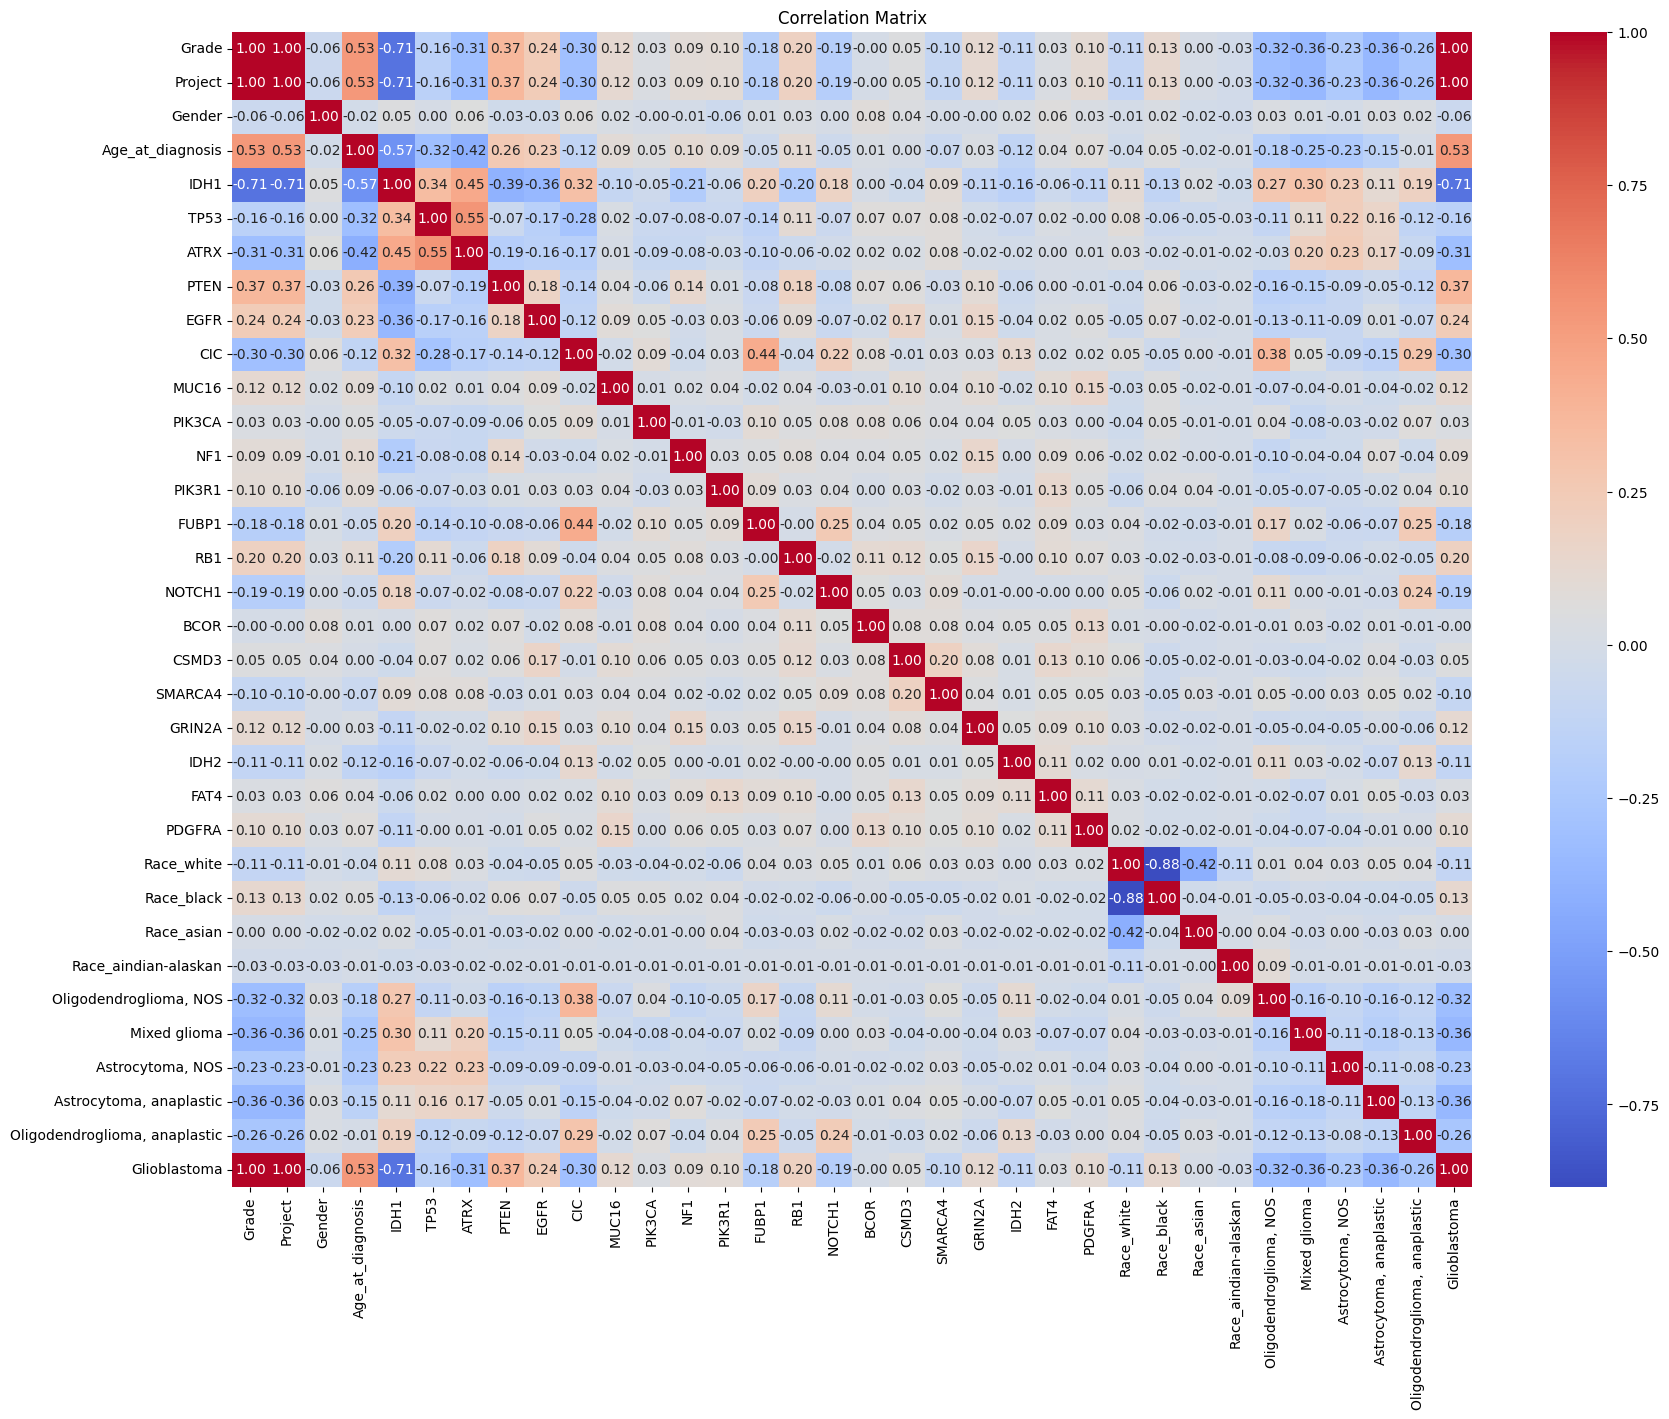

In [48]:
# Матрица корреляций
dataset_complete = pd.read_csv("dataset_complete.csv")
corr_matrix = dataset_complete.corr()
print(corr_matrix)

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# По умолчанию .corr() использует корреляцию Пирсона. Она применена здесь из соображения центральной предельной теоремы и общего удобства.
# Выводы по карте корреляций:
# 1. Диагнозы в 'Grade' (как и все прочие данные) выставлены в полном соответствии с именем проекта 'Project', с которым связано наблюдение;
# 2. Диагноз Глиобластомы (GBM) выставляется априори если таковой являлся первичным диагнозом;
# 3. На диагноз Глиобластомы (GBM) сильно влияет возраст (Age_at_diagnosis) - чем старше, тем вероятнее;
# 4. Немутировавший Изоцитрат дегидрогеназа (IDH1) сильно свидетельствует что Глиобластома (GBM) маловероятна;
# 5. Немутировавший Реконструктор хроматина ATRX (ATRX) слабо свидетельствует что Глиобластома (GBM) маловероятна;
# 6. Мутировавший Фосфатаза и гомолог по тензинам (PTEN) слабо свидетельствует что Глиобластома (GBM) вероятна;
# 7. Немутировавший CIC слабо свидетельствует что Глиобластома (GBM) маловероятна;
# 8. Первичные диагнозы "Oligodendroglioma, NOS", "Mixed glioma", "Astrocytoma, NOS", "Astrocytoma, anaplastic", "Oligodendroglioma, anaplastic" слабо свидетельствуют что Глиобластома (GBM) маловероятна;


# Часть 3

Решить поставленную на наборе данных задачу:
1. сделать препроцессинг данных
2. разбить выборку на части
3. выбрать модель и обучить
4. построить метрики качества
5. написать вывод по полученным результатам

## Ответ

In [136]:
# 1. Препроцессинг.
# Удаление лишних, слабо коррелирующих и семантически дублирующихся фичей.
model_dataset = pd.read_csv("dataset_complete.csv")
model_dataset.drop(columns=['Project', 'Gender', 'PIK3CA', 'NF1', 'PIK3R1', 'BCOR', 'CSMD3', 'FAT4', 'Race_asian', 'Race_aindian-alaskan', 'Glioblastoma'], inplace=True)

model_dataset.to_csv("model_dataset.csv", index=False)
X = model_dataset.drop(columns=['Grade'])
y = model_dataset['Grade']
y

0      0
1      0
2      0
3      0
4      0
      ..
834    1
835    1
836    1
837    1
838    1
Name: Grade, Length: 839, dtype: int64

In [137]:
# 2. Разбиение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
# 3. Выбрать модель и обучить
svm_classifier = SVC(kernel='poly', C=1, random_state=42, probability=True)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

# Привнесение порога на вероятности предсказаний для повышения recall
probs = svm_classifier.predict_proba(X_test)[:, 1]
threshold = 0.2
y_pred = (probs >= threshold).astype(int)

accuracy = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(accuracy)
print(report)

0.751269035532995
              precision    recall  f1-score   support

           0       0.90      0.51      0.65        89
           1       0.63      0.94      0.75        79

    accuracy                           0.71       168
   macro avg       0.76      0.72      0.70       168
weighted avg       0.77      0.71      0.70       168



In [ ]:
# Вывод
# Обучена модель SVM классификатора со следующими параметрами:
# f1_score = 0.75 //Удовлетворительное качество модели
# recall (на диагноз Глиобластомы) = 0.94 //Умышленная высокая чувствительность к диагностированию Глиобластомы (лучше здоровых иногда диагностировать и пролечить, чем пропустить болеющих)